In [4718]:
# Import dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV


### Read the `heart.csv` data from the `Resources` folder into a Pandas DataFrame.

In [4719]:
# Reading in the heart.csv file
file_path = r'/Users/sandrabotica/Desktop/ML_Project_4/Resources/heart.csv'
# file_path = 'Resources/heart.csv'
# data = Path('Resources/heart.csv')
heart_df = pd.read_csv(file_path)
heart_df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


### Data exploration

In [4720]:
# Checking datatypes, row number, column number and if any null values
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4721]:
# Checking summary statistics on table
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


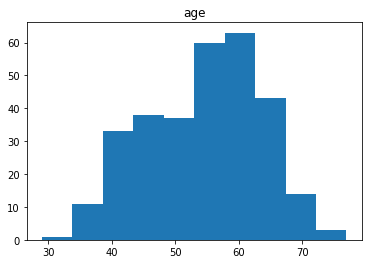

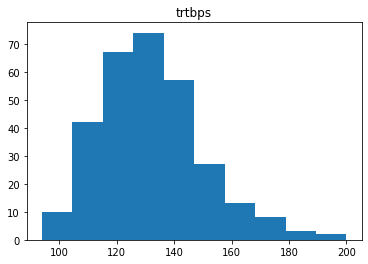

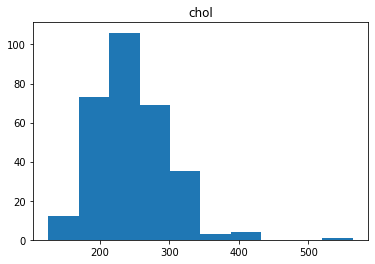

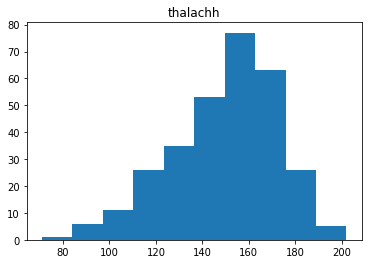

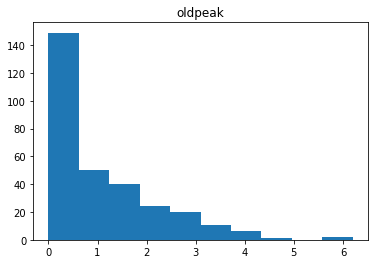

In [4722]:
# Histograms on columns with continuous values
data_numbered = heart_df[['age','trtbps','chol','thalachh','oldpeak']]

for i in data_numbered.columns:
    plt.hist(data_numbered[i])
    plt.title(i)
    plt.show()

In [4723]:
# Checking value_counts for age column 
heart_df["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [4724]:
# Checking value_counts for sex column 
heart_df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

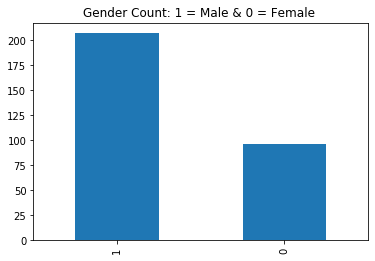

In [4725]:
# Bar chart of value_counts for "sex" column
heart_df.sex.value_counts()[heart_df.sex.unique()].plot(kind='bar', title="Gender Count: 1 = Male & 0 = Female ")

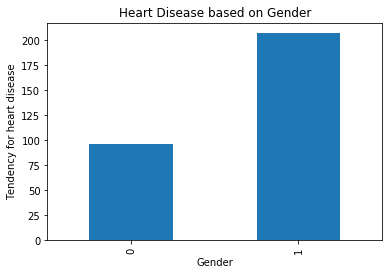

In [4726]:
gender_plot = heart_df.groupby("sex")["age"].count()
gender_plot.plot(kind="bar")
plt.title("Heart Disease based on Gender")
plt.xlabel("Gender")
plt.ylabel("Tendency for heart disease")
plt.show()

In [4727]:
# Checking value_counts for cp column 
heart_df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

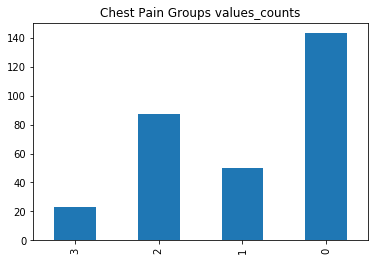

In [4728]:
# Bar chart of value_counts for "cp" column
heart_df.cp.value_counts()[heart_df.cp.unique()].plot(kind='bar', title="Chest Pain Groups values_counts")

In [4729]:
# Checking value_counts for trtbps column 
heart_df["trtbps"].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trtbps, dtype: int64

In [4730]:
# Checking value_counts for chol column 
heart_df["chol"].value_counts()

234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

In [4731]:
# Checking value_counts for fbs column 
heart_df["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

/Users/sandrabotica/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


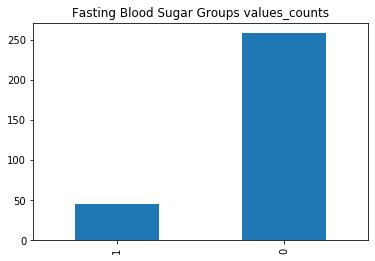

In [4732]:
# Bar chart of value_counts for "fbs" column
heart_df.fbs.value_counts()[heart_df.fbs.unique()].plot(kind='bar', title="Fasting Blood Sugar Groups values_counts")

In [4733]:
# Checking value_counts for restecg column 
heart_df["restecg"].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

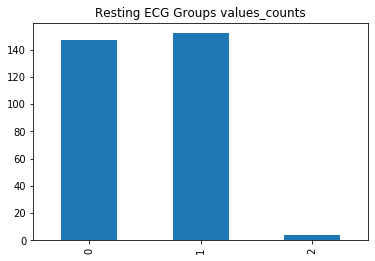

In [4734]:
# Bar chart of value_counts for "restecg" column
heart_df.restecg.value_counts()[heart_df.restecg.unique()].plot(kind='bar', title="Resting ECG Groups values_counts")

In [4735]:
# Checking value_counts for thalachh column 
heart_df["thalachh"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalachh, Length: 91, dtype: int64

In [4736]:
# Checking value_counts for exng column 
heart_df["exng"].value_counts()

0    204
1     99
Name: exng, dtype: int64

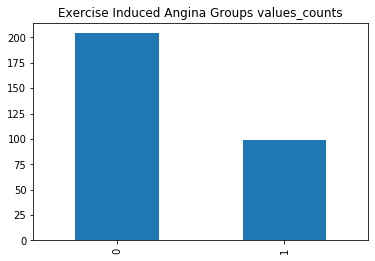

In [4737]:
# Bar chart of value_counts for "exng" column
heart_df.exng.value_counts()[heart_df.exng.unique()].plot(kind='bar', title="Exercise Induced Angina Groups values_counts")

In [4738]:
# Checking value_counts for oldpeak column 
heart_df["oldpeak"].value_counts()

0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: oldpeak, dtype: int64

In [4739]:
# Checking value_counts for slp column 
heart_df["slp"].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

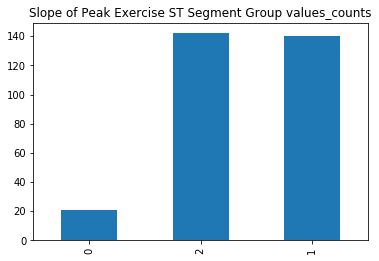

In [4740]:
# Bar chart of value_counts for "slp" column
heart_df.slp.value_counts()[heart_df.slp.unique()].plot(kind='bar', title="Slope of Peak Exercise ST Segment Group values_counts")

In [4741]:
# Checking value_counts for caa column 
heart_df["caa"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

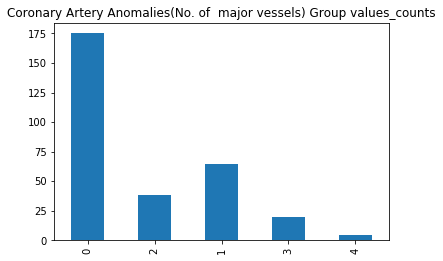

In [4742]:
# Bar chart of value_counts for "caa" column
heart_df.caa.value_counts()[heart_df.caa.unique()].plot(kind='bar', title="Coronary Artery Anomalies(No. of  major vessels) Group values_counts")

In [4743]:
# Checking value_counts for thall column 
heart_df["thall"].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

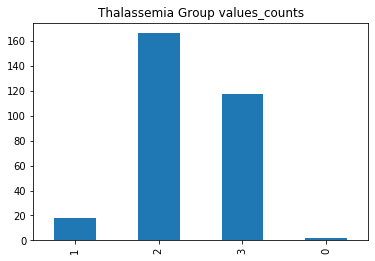

In [4744]:
# Bar chart of value_counts for "thall" column
heart_df.thall.value_counts()[heart_df.thall.unique()].plot(kind='bar', title="Thalassemia Group values_counts")

In [4745]:
# Checking value_counts for output column 
heart_df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

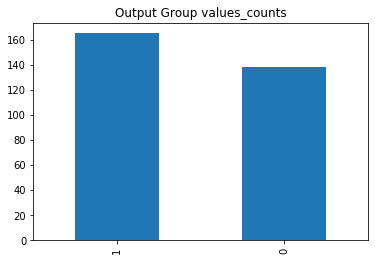

In [4746]:
# Bar chart of value_counts for "output" column
heart_df.output.value_counts()[heart_df.output.unique()].plot(kind='bar', title="Output Group values_counts")

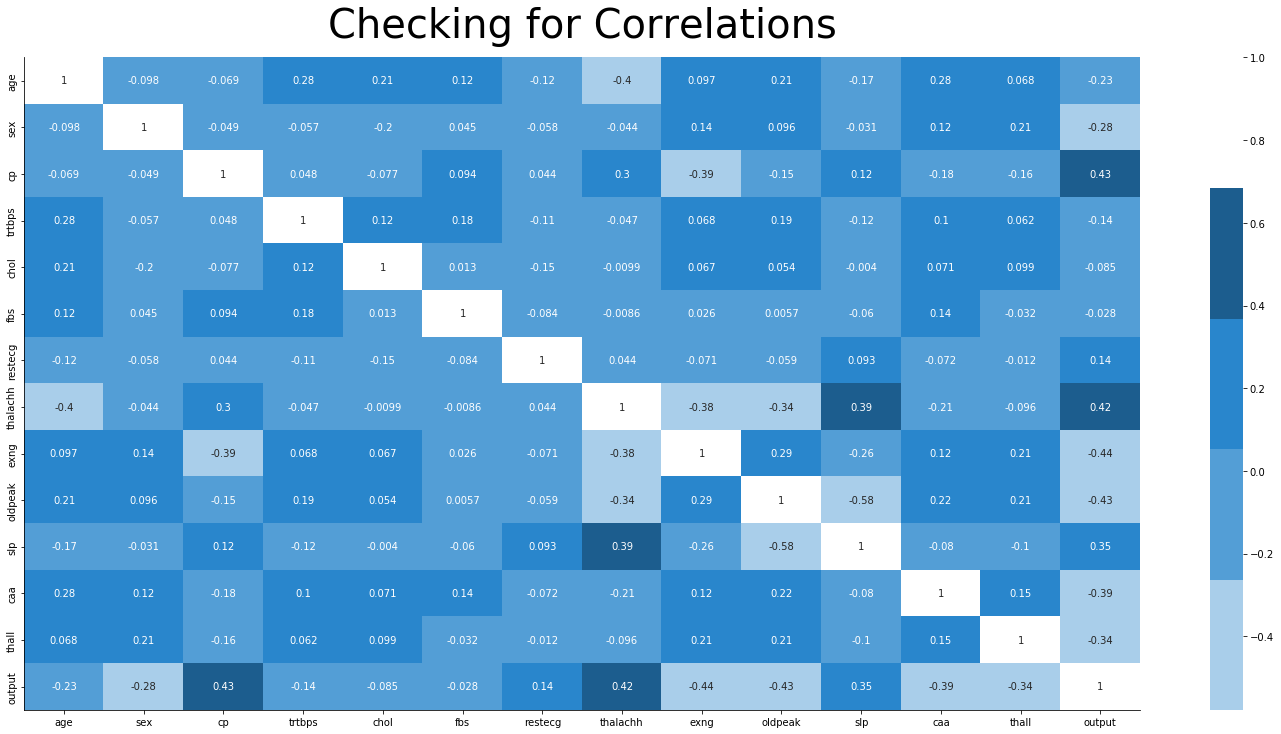

In [4747]:
plt.figure(figsize=[25,12])
heat = heart_df.corr()
sns.heatmap(heat, cmap=['#a9ceea','#539ed6','#2986cc','#1c5d8e','white'], annot=True)
plt.title("Checking for Correlations", size=40, pad=20)
sns.despine()
plt.show()

### Creating more features with binning of column values

In [4748]:
# # Creating 10 year 'bins' for age column 
# heart_df['age groups'] = pd.cut(x=heart_df["age"], 
#                           bins=[29, 39, 49, 59, 69, 79],
#                           labels = ["age less than 39", 
#                                     "age between 39 and 49",
#                                     "age between 49 and 59", 
#                                     "age between 59 and 69",
#                                     "age between 69 and 79"])
# heart_df.head(2)

In [4749]:
# # Creating 2 'bins' for cp column 
# heart_df['cp groups'] = pd.cut(x=heart_df["cp"], 
#                           bins=[0, 87, 143],
#                           labels = ["cp group 1,2,3 atypical, non-anginal,asymptomatic ", 
#                                     "cp group 0 typical angina"])
# heart_df.head(2)

In [4750]:
# # Creating 5 'bins' for trtbps column 
# heart_df['trtbps groups'] = pd.cut(x=heart_df["trtbps"], 
#                           bins=[0, 119, 129, 139, 179, 200],
#                           labels = ["bp less than 120", 
#                                     "bp between 120 and 129", 
#                                     "bp between 130 and 139",
#                                     "bp between 140 and 179",
#                                     "bp 180 or higher"])
# heart_df.head(2)

In [4751]:
# # Creating 3 'bins' for chol column 
# heart_df['chol groups'] = pd.cut(x=heart_df["chol"], 
#                           bins=[0, 199, 239, 564],
#                           labels = ["chol less than 200", 
#                                     "chol between 200 and 239", 
#                                     "chol 240 or higher"])
# heart_df.head(2)

In [4752]:
# # Creating 2 'bins' for restecg column 

In [4753]:
# # Creating X 'bins' for thalachh column use pd.cut

In [4754]:
# # Creating X 'bins' for oldpeak column use pd.cut

In [4755]:
# # Creating 2 'bins' for slp column 

In [4756]:
# # Creating 2 'bins' for caa column 
# heart_df['caa groups'] = pd.cut(x=heart_df["caa"], 
#                           bins=[0, 174, 176],
#                           labels = ["caa group 1,2,3,4 blood vessel anomalies", 
#                                     "caa group 0 blood vessel anomalies"])
# heart_df.head(2)

In [4757]:
# # Creating 2 'bins' for thall column 

In [4758]:
# heart_df.info()

In [4759]:
# # Generate our categorical variable lists
# categorical_list = heart_df.dtypes[heart_df.dtypes == "category"].index.tolist()
# categorical_list

In [4760]:
# # Check the number of unique values in each column
# heart_df[categorical_list].nunique()

In [4761]:
# # Convert categorical data to numeric with `pd.get_dummies`
# categorical_encoded = pd.get_dummies(heart_df[categorical_list])
# categorical_encoded.head()

In [4762]:
# # Concatenate the `categorical_data` encoded dummies with the DataFrame
# heart_df = pd.concat([heart_df, categorical_encoded], axis=1)

# # Display the combined DataFrame.
# heart_df.head()

In [4763]:
# # Dropping categorical column 
# heart_df = heart_df.drop(columns = categorical_list, axis=1)
# # # Dropping age, cp, trtbps, chol, restecg, thalachh, oldpeak, slp, caa and thall column
# # heart_df = heart_df.drop(columns = ["age","cp", "trtbps", "chol", "restecg", "thalachh", "oldpeak", "slp", "caa", "thall"], axis=1)
# # Dropping age, trtbps and chol column
# # heart_df = heart_df.drop(columns = ["age", "cp", "trtbps", "chol", "caa"], axis=1)
# # heart_df = heart_df.drop(columns = ["age"], axis=1)
# # heart_df = heart_df.drop(columns = ["cp"], axis=1)
# # heart_df = heart_df.drop(columns = ["trtbps"], axis=1)
# # heart_df = heart_df.drop(columns = ["chol"], axis=1)
# # heart_df = heart_df.drop(columns = [ "caa"], axis=1)
# # heart_df = heart_df.drop(columns = ["chol", "caa"], axis=1)
# # heart_df = heart_df.drop(columns = ["trtbps","chol", "caa"], axis=1)
# # heart_df = heart_df.drop(columns = [ "cp","trtbps","chol", "caa"], axis=1)
# heart_df = heart_df.drop(columns = ["age", "cp", "trtbps", "chol", "caa"], axis=1)
# heart_df.head()

## Creating the labels set (`y`)  from the “output” column, and the features (`X`) DataFrame from the remaining columns.

In [4764]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = heart_df["output"]

# Separate the X variable, the features
# X = heart_df.drop(columns=['output'])
# X = heart_df.drop(columns=['chol', 'output'])
# X = heart_df.drop(columns=['fbs', 'output'])
# X = heart_df.drop(columns=['chol', 'fbs', 'output'])
# X = heart_df.drop(columns=['sex', 'chol', 'fbs', 'output'])
# X = heart_df.drop(columns=['age', 'chol', 'fbs', 'output'])
# X = heart_df.drop(columns=['oldpeak','chol', 'fbs', 'output'])
# X = heart_df.drop(columns=['thall', 'chol', 'fbs', 'output'])
# X = heart_df.drop(columns=['cp', 'chol', 'fbs', 'output'])
# X = heart_df.drop(columns=['restecg', 'chol', 'fbs','output'])
# X = heart_df.drop(columns=['exng', 'chol', 'fbs', 'output'])
# X = heart_df.drop(columns=['oldpeak','chol', 'fbs', 'output'])
# X = heart_df.drop(columns=['slp','chol', 'fbs', 'output'])
# X = heart_df.drop(columns=['caa','chol', 'fbs', 'output'])
# X = heart_df.drop(columns=['thalachh', 'chol', 'fbs', 'output'])

X = heart_df.drop(columns=['cp', 'trtbps', 'chol', 'restecg', 'output'])

# X = heart_df.drop(columns=['cp', 'trtbps', 'chol', 'restecg', 'thalachh', 'output'])

# X = heart_df.drop(columns=['age', 'sex',  'trtbps', 'chol', 'fbs', 'restecg',
#        'exng', 'oldpeak', 'caa', 'thall', 'output'])

# X = heart_df.drop(columns=['age',  'trtbps', 'chol', 'fbs', 'restecg',  'slp', 'output'])

# X = heart_df.drop(columns=['age', 'trtbps', 'chol', 'fbs', 'restecg',  'slp', 'output'])

# X = heart_df.drop(columns=['slp', 'sex', 'restecg', 'fbs','output'])


In [4765]:
# Review the X variable DataFrame
X.head()

,age,sex,fbs,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,1,150,0,2.3,0,0,1
1,37,1,0,187,0,3.5,0,0,2
2,41,0,0,172,0,1.4,2,0,2
3,56,1,0,178,0,0.8,2,0,2
4,57,0,0,163,1,0.6,2,0,2


In [4766]:
# Check the balance of the labels values/target variable(y)
y.value_counts()

1    165
0    138
Name: output, dtype: int64

## Split the Data into Training and Testing Sets

In [4767]:
# Split into testing and training sets using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4768]:
# # Split into testing and training sets using train_test_split with the test size 20% instead of 25%
# # Assign a random_state of 1 to the function
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [4769]:
# # Split into testing and training sets using train_test_split
# # Assign a random_state of 1 to the function
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [4770]:
# # Perform feature scaling on numerical features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [4771]:
# # Perform feature selection using SelectKBest and ANOVA F-value
# selector = SelectKBest(score_func=f_classif, k=5)
# X_train_selected = selector.fit_transform(X_train_scaled, y_train)
# X_test_selected = selector.transform(X_test_scaled)

In [4772]:
# # Create an instance of Logistic Regression model
# model = LogisticRegression()

In [4773]:
# # Define the hyperparameter grid for grid search
# param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

In [4774]:
# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X_train_selected, y_train)

In [4775]:
# # Get the best model from grid search
# best_model = grid_search.best_estimator_

In [4776]:
# # Predict the target variable for the test data
# y_pred = best_model.predict(X_test_selected)

In [4777]:
# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [4778]:
# # You can also access the best model's coefficients and intercept
# coefficients = best_model.coef_
# intercept = best_model.intercept_

In [4779]:
# # Perform feature selection using SelectKBest and ANOVA F-value
# selector = SelectKBest(score_func=f_classif, k=5)
# X_train_selected = selector.fit_transform(X_train, y_train)
# X_test_selected = selector.transform(X_test)

In [4780]:
# # Create an instance of Logistic Regression model
# model = LogisticRegression()

In [4781]:
# # Define the hyperparameter grid for grid search
# param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

In [4782]:
# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

In [4783]:
# # Get the best model from grid search
# best_model = grid_search.best_estimator_

In [4784]:
# # Predict the target variable for the test data
# y_pred = best_model.predict(X_test)

In [4785]:
# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [4786]:
# # You can also access the best model's coefficients and intercept
# coefficients = best_model.coef_
# intercept = best_model.intercept_
# print(f"Coefficients: {coefficients}")
# print(f"Intercept: {intercept}")

## Creating a Logistic Regression Model with the original data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [4787]:
# Declare a logistic regression model.
# Apply a random_state of 1 to the model
lr_model = LogisticRegression(solver='lbfgs',random_state=1)
# lr_model = LogisticRegression(solver='liblinear',random_state=1)
# lr_model = LogisticRegression(solver='newton-cg',random_state=1)


# Fit and save the logistic regression model using the training data
lr_model.fit(X_train, y_train)

/Users/sandrabotica/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4788]:
# Score the model
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.8281938325991189
Testing Data Score: 0.8289473684210527


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [4789]:
# Make a prediction using the testing data
lr_testing_predictions = lr_model.predict(X_test)
# Printing DataFrame of Actual and Predicted results
lr_results = pd.DataFrame({"Prediction": lr_testing_predictions, "Actual": y_test}).reset_index(drop=True)
lr_results.head(10)


,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,1,1


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [4790]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, lr_testing_predictions)

0.8226480836236933

In [4791]:
# Create and save the confusion matrix for the testing data
lr_test_matrix = confusion_matrix(y_test, lr_testing_predictions)
lr_df = pd.DataFrame(
    lr_test_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
lr_acc_score = accuracy_score(y_test, lr_testing_predictions)

In [4792]:
# Displaying results
print("Confusion Matrix")
display(lr_df)
print(f"Accuracy Score : {lr_acc_score}")
print("Classification Report")
print(classification_report(y_test, lr_testing_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,26,9
Actual 1,4,37


Accuracy Score : 0.8289473684210527
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.80      0.90      0.85        41

    accuracy                           0.83        76
   macro avg       0.84      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (< 50% diameter narrowing. less chance of heart disease) and `1` (> 50% diameter narrowing. more chance of heart disease) labels?

**Answer:** The logistic regression model was better at predicting the `1` label then the `0` labels. This may be due to the bias of data having 41 `1`s and only 35 `0`s. 

A balanced_accuracy_score of 82% makes one think that this is a good prediction model, as does the 83% accuracy score in the classification report.

Based on the confusion matrix.
 - Total predictions = 76
 - Correct predictions = 63 (26 `0`s TN, 37 `1`s TP)
 - Incorrect predictions = 13 (9 `0`s FP, 4 `1`s at FN)

Based on the classification report.
 - Precision: 20% of the time (0.80 precision score) the model predicted a false positive (predicted a `1` but was actually a `0`), hence 9 people (from the confusion matrix) were identified as more chance of heart disease when they were less chance of heart disease, predicting a FALSE ALARM (Type 1 error).
 - Recall: 10% of the time (0.90 recall score) the model predicted a false negative (predicted a `0` but was actually a `1`), hence 4 people (from the confusion matrix) who had more chance of heart disease have been MISSED in the prediction (Type 2 error).

## Use PCA to reduce the number of factors 

In [4793]:
# # heart_df_scaled = heart_df.drop(columns="output")
# heart_df_scaled = heart_df

In [4794]:
# # Use the StandardScaler module from scikit-learn to normalize the data from the CSV file
# # fit_transform function to scale all columns 
# heart_df_scaled = StandardScaler().fit_transform(heart_df_scaled)

# # Diplay the first row of the scaled data
# heart_df_scaled[0:1]

In [4795]:
# # Create a DataFrame with the scaled data, excluding the target variable column "output"
# heart_df_scaled = pd.DataFrame(heart_df_scaled, columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
#        'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'])

# # Display sample data
# heart_df_scaled.head()

In [4796]:
# # Separate the data into labels and features

# # Separate the y variable, the labels
# y = heart_df_scaled["output"]

# # Separate the X variable, the features
# X = heart_df_scaled
# # X = heart_df_scaled.drop(columns=['cp', 'trtbps', 'chol', 'restecg'])

In [4797]:
# # Split the data using train_test_split
# # Assign a random_state of 1 to the function
# X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, 
#                                                     random_state=1)

## Use PCA to reduce the number of factors 

In [4798]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=2)

In [4799]:
# Fit the PCA model on the heart_df DataFrame
heart_pca = pca.fit_transform(heart_df)

# Review the first 5 rows of list data
heart_pca[:5]

array([[-12.26772602,   2.87000191],
       [  2.68966168, -39.87386288],
       [-42.9506397 , -23.63953003],
       [-10.94520605, -28.44110112],
       [106.97858286, -15.87943559]])

In [4800]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.74751318, 0.15037261])

In [4801]:
# Create the PCA DataFrame
heart_pca_df = pd.DataFrame(
    heart_pca,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
heart_pca_df.head()

,PCA1,PCA2
0,-12.267726,2.870002
1,2.689662,-39.873863
2,-42.950640,-23.639530
3,-10.945206,-28.441101
4,106.978583,-15.879436


In [4802]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(heart_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,977929.839679
1,2,494068.927479
2,3,361237.742162
3,4,281487.472855
4,5,221882.528456


In [4803]:
# Plot the Elbow Curve
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [4804]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(heart_pca_df)

# Make predictions
k_3 = model.predict(heart_pca_df)

# Create a copy of the PCA DataFrame
heart_pca_predictions_df = heart_pca_df.copy()

# Add a class column with the labels
heart_pca_predictions_df["feature_segments"] = k_3

In [4805]:
# Plot the clusters
heart_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="feature_segments"
)

:NdOverlay   [feature_segments]
   :Scatter   [PCA1]   (PCA2)

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [4806]:
# # Import the RandomOverSampler module form imbalanced-learn
# from imblearn.over_sampling import RandomOverSampler

# # Instantiate the random oversampler model
# # # Assign a random_state parameter of 1 to the model
# ros_model = RandomOverSampler(random_state=1)

# # Fit the original training data to the random_oversampler model
# X_res, y_res = ros_model.fit_resample(X_train, y_train)

In [4807]:
# # Count the distinct values of the resampled labels data
# X_res.shape

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [4808]:
# # Instantiate the Logistic Regression model
# # Assign a random_state parameter of 1 to the model
# classifier_rs = LogisticRegression(solver='lbfgs', random_state=1)
# classifier_rs

# # Fit the model using the resampled training data
# classifier_rs.fit(X_res, y_res)

# # Make a prediction using the testing data
# testing_predictions_rs = classifier.predict(X_test)
# results_rs = pd.DataFrame({"Prediction": testing_predictions_rs, "Actual": y_test}).reset_index(drop=True)
# results_rs.head(10)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [4809]:
# # Print the balanced_accuracy score of the model 
# balanced_accuracy_score(y_test, testing_predictions_rs)

In [4810]:
# # Generate a confusion matrix for the model
# confusion_matrix(y_test, testing_predictions_rs)

In [4811]:
# # Print the classification report for the model
# print(classification_report(y_test, testing_predictions_rs))

### Step 4: Answer the following question

**Question:** How well does the logistic regression model predict both the `0` (< 50% diameter narrowing. less chance of heart disease) and `1` (> 50% diameter narrowing. more chance of heart disease) labels?

**Answer:** 

## Creating a Logistic Regression Model with scaled data

#### Considering the features "age", "trtbps", "chol" and "thalachh" were much larger values to the other features the following is an exploration of how predictions would be different if I use the StandardScaler module and fit_transform function to scale all columns (except for output)

In [4812]:
# heart_df_scaled = heart_df.drop(columns="output")

In [4813]:
# # Use the StandardScaler module from scikit-learn to normalize the data from the CSV file
# # fit_transform function to scale all columns 
# heart_df_scaled = StandardScaler().fit_transform(heart_df_scaled)

# # Diplay the first row of the scaled data
# heart_df_scaled[0:1]

In [4814]:
# # Create a DataFrame with the scaled data, excluding the target variable column "output"
# heart_df_scaled = pd.DataFrame(heart_df_scaled, columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
#        'exng', 'oldpeak', 'slp', 'caa', 'thall'])

# # Display sample data
# heart_df_scaled.head()

In [4815]:
# # Separate the data into labels and features

# # Separate the y variable, the labels
# y = heart_df["output"]

# # Separate the X variable, the features
# X = heart_df_scaled
# # X = heart_df_scaled.drop(columns=['cp', 'trtbps', 'chol', 'restecg'])

In [4816]:
# # Split the data using train_test_split
# # Assign a random_state of 1 to the function
# X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                     y, 
#                                                     random_state=1)
# X_train.shape

In [4817]:
# # Declare a logistic regression model.
# # Apply a random_state of 1 to the model
# lr_model_scaled = LogisticRegression(solver='lbfgs',random_state=1)
# # lr_model_scaled = LogisticRegression(solver='liblinear',random_state=1)
# # lr_model_scaled = LogisticRegression(solver='sag',random_state=1)
# # lr_model_scaled = LogisticRegression(solver='saga',random_state=1)

# # Fit and save the logistic regression model using the training data
# lr_model_scaled.fit(X_train, y_train)

In [4818]:
# # Score the model
# print(f"Training Data Score: {lr_model_scaled.score(X_train, y_train)}")
# print(f"Testing Data Score: {lr_model_scaled.score(X_test, y_test)}")

In [4819]:
# # Make a prediction using the testing data
# lr_scaled_testing_predictions = lr_model_scaled.predict(X_test)
# lr_scaled_results = pd.DataFrame({"Prediction": lr_scaled_testing_predictions, "Actual": y_test}).reset_index(drop=True)
# lr_scaled_results.head(10)

In [4820]:
# # Print the balanced_accuracy score of the model
# balanced_accuracy_score(y_test, lr_scaled_testing_predictions)

In [4821]:
# # Create and save the confusion matrix for the testing data
# lr_scaled_test_matrix = confusion_matrix(y_test, lr_scaled_testing_predictions)

# # Print the confusion matrix for the testing data
# print(lr_scaled_test_matrix)

In [4822]:
# # Create and save the testing classification report
# lr_scaled_testing_report = classification_report(y_test, lr_scaled_testing_predictions)

# # Print the testing classification report
# print(lr_scaled_testing_report)

## Random Forest Classifier

### Fitting the Random Forest Model

In [4823]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [4824]:
# Fitting the model
# rf_model = rf_model.fit(X_train_scaled, y_train)
# rf_model = rf_model.fit(X_train, y_train)

# Fit the model and use .ravel()on the "y_train" data. 
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

### Making Predictions Using the Random Forest Model

In [4825]:
# Making predictions using the testing data
rf_testing_predictions = rf_model.predict(X_test)

# Printing DataFrame of Actual and Predicted results
rf_results = pd.DataFrame({"Prediction": rf_testing_predictions, "Actual": y_test}).reset_index(drop=True)
rf_results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,1,1


### Model Evaluation

In [4826]:
# Calculating the confusion matrix
rf_test_matrix = confusion_matrix(y_test, rf_testing_predictions)
rf_df = pd.DataFrame(
    rf_test_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
rf_acc_score = accuracy_score(y_test, rf_testing_predictions)

In [4827]:
# Displaying results
print("Confusion Matrix")
display(rf_df)
print(f"Accuracy Score : {rf_acc_score}")
print("Classification Report")
print(classification_report(y_test, rf_testing_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,28,7
Actual 1,6,35


Accuracy Score : 0.8289473684210527
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.83      0.85      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



### Feature Importance

In [4828]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.20195728992442888, 'thalachh'),
 (0.1641855845058843, 'oldpeak'),
 (0.1452458581192625, 'caa'),
 (0.14371690950676036, 'age'),
 (0.1151788459810616, 'exng'),
 (0.10377283206513929, 'thall'),
 (0.05634484159854478, 'slp'),
 (0.05181718295183995, 'sex'),
 (0.017780655347078428, 'fbs')]

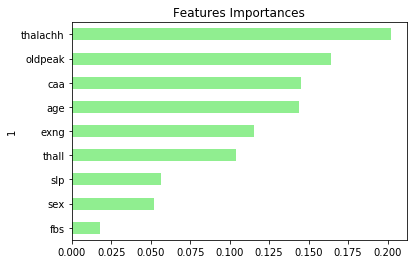

In [4829]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## KNN - K- Nearest Neighbors Classifier

### Fitting the KNN Model

In [4830]:
# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn_model = KNeighborsClassifier(n_neighbors=3)

In [4831]:
# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Making Predictions Using the KNN Model

In [4832]:
# Create predictions
knn_testing_predictions = knn_model.predict(X_test)
# Printing DataFrame of Actual and Predicted results
knn_results = pd.DataFrame({"Prediction": knn_testing_predictions, "Actual": y_test}).reset_index(drop=True)
knn_results.head(10)

,Prediction,Actual
0,1,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,0
6,0,0
7,0,1
8,0,0
9,1,1


### Model Evaluation

In [4833]:
# Create and save the confusion matrix for the testing data
knn_test_matrix = confusion_matrix(y_test, knn_testing_predictions)
knn_df = pd.DataFrame(
    knn_test_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
knn_acc_score = accuracy_score(y_test, knn_testing_predictions)

In [4834]:
# Displaying results
print("Confusion Matrix")
display(knn_df)
print(f"Accuracy Score : {knn_acc_score}")
print("Classification Report")
print(classification_report(y_test, knn_testing_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,19,16
Actual 1,13,28


Accuracy Score : 0.618421052631579
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.54      0.57        35
           1       0.64      0.68      0.66        41

    accuracy                           0.62        76
   macro avg       0.62      0.61      0.61        76
weighted avg       0.62      0.62      0.62        76



## Support Vector Machine Linear Classifier

### Fitting the SVM Model

In [4835]:
# Instantiate the SVM linear classifier
svm_model = SVC(kernel='linear', random_state=1)

In [4836]:
# Train the model
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

### Making Predictions Using the SVM Model

In [4837]:
# Create predictions
svm_testing_predictions = svm_model.predict(X_test)
# Printing DataFrame of Actual and Predicted results
svm_results = pd.DataFrame({"Prediction": svm_testing_predictions, "Actual": y_test}).reset_index(drop=True)
svm_results.head(10)


,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,1,1


### Model Evaluation

In [4838]:
# Create and save the confusion matrix for the testing data
svm_test_matrix = confusion_matrix(y_test, svm_testing_predictions)
svm_df = pd.DataFrame(
    svm_test_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
svm_acc_score = accuracy_score(y_test, svm_testing_predictions)

In [4839]:
# Displaying results
print("Confusion Matrix")
display(svm_df)
print(f"Accuracy Score : {svm_acc_score}")
print("Classification Report")
print(classification_report(y_test, svm_testing_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,25,10
Actual 1,5,36


Accuracy Score : 0.8026315789473685
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        35
           1       0.78      0.88      0.83        41

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76

